In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
tf.autograph.set_verbosity(0)

In [2]:
# load the dataset
X = np.load("data/X.npy")
y = np.load("data/y.npy")

In [3]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


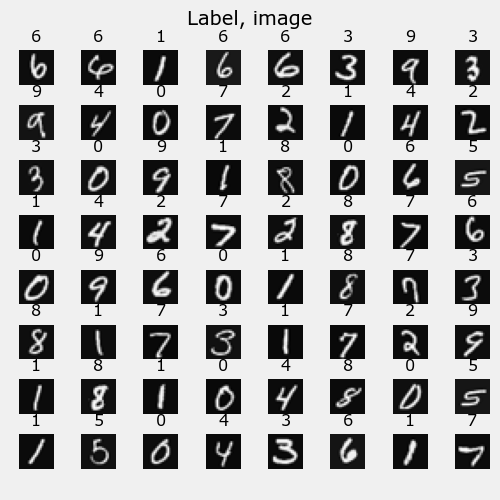

In [4]:
# visualize a portion of the data set
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [5]:
# create the model
tf.random.set_seed(13) # for consistent results
model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),
        Dense(units=25, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=10, activation='linear')
    ]
)

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

# fit the model to the data, and save the history of costs
history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - loss: 2.0035
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.9025
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.5665
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 0.4237
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.3482
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 0.2984
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 0.2643
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.2385
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 0.2183
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 0.2017
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.1866
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 0.1738
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.1618
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.1505
Epoch 15/40
157/157 ━━━━━━━━━

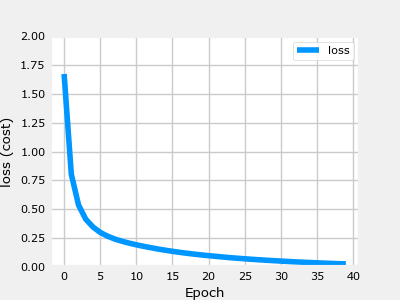

In [8]:
fig,ax = plt.subplots(1,1, figsize = (4,3))
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
ax.plot(history.history['loss'], label='loss')
ax.set_ylim([0, 2])
ax.set_xlabel('Epoch')
ax.set_ylabel('loss (cost)')
ax.legend()
ax.grid(True)
plt.show()

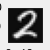

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
 predicting the image: 
[[-11.85523    -7.1524096  11.789116   -2.8514228 -12.876884   -9.617833
  -10.710289  -10.239024    1.4104984 -21.566935 ]]
 Largest Prediction index: 2


In [9]:
# predict a number
random_image = X[np.random.randint(X.shape[0])]

# display a single digit
fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
X_reshaped = random_image.reshape((20,20)).T
# Display the image
ax.imshow(X_reshaped, cmap='gray')
plt.show()

prediction = model.predict(random_image.reshape(1,400))  # prediction
print(f" predicting the image: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")


In [10]:
prediction_p = tf.nn.softmax(prediction)

print(f"predicting the image. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

predicting the image. Probability vector: 
[[5.3873746e-11 5.9400036e-09 9.9996841e-01 4.3820862e-07 1.9394496e-11
  5.0473897e-10 1.6928518e-10 2.7119779e-10 3.1089239e-05 3.2631608e-15]]
Total of predictions: 1.000


In [11]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

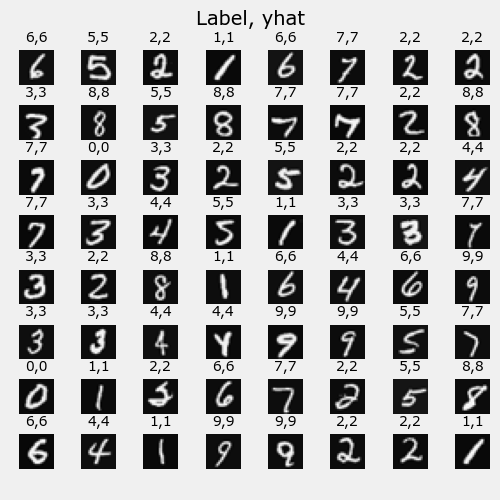

In [12]:
# predict a random sample of 64 digits
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
18 errors out of 5000 images


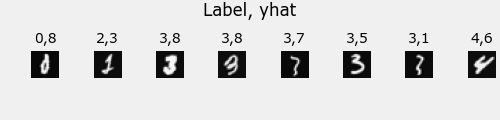

In [13]:
# display the errors of the model
f = model.predict(X)
yhat = np.argmax(f, axis=1)
doo = yhat != y[:,0]
idxs = np.where(yhat != y[:,0])[0]
if len(idxs) == 0:
    print("no errors found")
else:
    cnt = min(8, len(idxs))
    fig, ax = plt.subplots(1,cnt, figsize=(5,1.2))
    fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.80]) #[left, bottom, right, top]
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

    for i in range(cnt):
        j = idxs[i]
        X_reshaped = X[j].reshape((20,20)).T

        # Display the image
        ax[i].imshow(X_reshaped, cmap='gray')

        # Predict using the Neural Network
        prediction = model.predict(X[j].reshape(1,400))
        prediction_p = tf.nn.softmax(prediction)
        yhat = np.argmax(prediction_p)

        # Display the label above the image
        ax[i].set_title(f"{y[j,0]},{yhat}",fontsize=10)
        ax[i].set_axis_off()
        fig.suptitle("Label, yhat", fontsize=12)

print( f"{len(idxs)} errors out of {len(X)} images")